# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dwiky Sumarlin
- **Email:** m381b4ky1205@bangkit.academy
- **ID Dicoding:** dwiky_sumarlin

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan peminjaman sepeda per bulannya?
- Berapa besar perbandingan antara pengguna casual dan registered?
- Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda di setiap musim?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
bike_per_day_df = pd.read_csv("https://raw.githubusercontent.com/dwkysss/bike_per_day/refs/heads/main/day.csv")
bike_per_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Pada bagian ini yakni mengambil data dari dataset day.csv yang mana disimpan pada Github kemudian disimpan pada sebuah DataFrame bernama bike_per_day_df menggunakan library pandas
- Ketika pembacaan data berhasil, maka ketika memakai fungsi head() yang mana akan menampilkan lima buah data teratas, akan menampilkan lima data teratas dari dataset day.csv
- Terdapat beberapa kolom, seperti: 
  - instant: Nomor urut data atau indeks.
  - dteday: Tanggal penyewaan sepeda
  - season: Indeks musim yang menunjukkan musim pada tanggal tertentu, di mana:
    - 1 = Musim semi
    - 2 = Musim panas
    - 3 = Musim gugur
    - 4 = Musim dingin
  - yr: Tahun penyewaan terjadi yang dibagi menjadi:
    - 0 = Tahun 2011
    - 1 = Tahun 2012
  - mnth: Bulan penyewaan terjadi, dari 1 hingga 12 (Januari = 1, Desember = 12).
  - holiday: Informasi apakah tanggal tersebut adalah hari libur atau bukan:
    - 0 = Bukan hari libur
    - 1 = Hari libur
  - weekday: Hari dalam seminggu, di mana: 0 = Minggu hingga 6 = Sabtu
  - workingday: informasi apakah hari tersebut adalah hari kerja, di mana  0 = Bukan hari kerja dan 1 = Hari kerja
  - weathersit: Kategori cuaca saat penyewaan terjadi, di mana:
    - 1 = Cuaca cerah atau sedikit berawan
    - 2 = Cuaca berawan, berkabut, atau ada sedikit hujan
    - 3 = Hujan lebat, salju, atau kondisi buruk lainnya
  - temp: Suhu rata-rata pada hari tersebut, dinormalisasi antara 0 dan 1, di mana 0 adalah suhu minimum dan 1 adalah suhu maksimum.
  - atemp: Suhu yang dirasakan oleh pengguna, juga dinormalisasi antara 0 dan 1.
  - hum: Kelembaban relatif pada hari tersebut, dinormalisasi antara 0 dan 1.
  - windspeed: Kecepatan angin pada hari tersebut, dinormalisasi antara 0 dan 1.
  - casual: Jumlah pengguna yang tidak terdaftar.
  - registered: Jumlah pengguna yang terdaftar dalam sistem.
  - cnt: Total jumlah penyewaan sepeda pada hari tersebut.

### Assessing Data

#### Menilai Tabel `bike_per_day_df`

In [3]:
bike_per_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
bike_per_day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
print("Jumlah duplikasi: ", bike_per_day_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
bike_per_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pada bagian awal assesing data, akan menggunakan info() yang akan menampilkan nama dari setiap kolom atau fitur dari dataset dan menampilkan pula tipe datanya. Terlihat terdapat tipe bertipe object yang perlu diubah.
- Pada bagian selanjutnya yakni mengecek apakah terdapat missing values pada masing masing kolom menggunakan isna() dan menjumlahkannya menggunakan sum(), namun terlihat pada output bahwa setiap kolom tidak memiliki sebuah cell yang memiliki missing values.
- Selanjutnya, pada bagian ketiga ini merupakan pengecakan apakah terdapat sebuah nilai duplikat atau tidak menggunakan duplicate() dan menjumlahkannya dengansum(). Namun menghasilkan nilai 0 yang menandakan tidak adanya nilai duplikat.

### Cleaning Data

#### Membersihkan tabel `bike_per_day_df`

##### Memperbaiki tipe data

In [7]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  bike_per_day_df[column] = pd.to_datetime(bike_per_day_df[column])

In [8]:
bike_per_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [9]:
bike_per_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Pada bagian ini mengganti sebuah tipe data dari kolom `dteday` menjadi format datetime menggunakan pandas.

## Exploratory Data Analysis (EDA)

### Explore `bike_per_day_df`

In [10]:
bike_per_day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
598,599,2012-08-21,3,1,8,0,2,1,1,0.649167,0.601025,0.673750,0.072771,1081,5925,7006
95,96,2011-04-06,2,0,4,0,3,1,1,0.390833,0.387608,0.470833,0.263063,413,2395,2808
560,561,2012-07-14,3,1,7,0,6,0,2,0.703333,0.666042,0.699167,0.143679,2355,4614,6969
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
121,122,2011-05-02,2,0,5,0,1,1,2,0.549167,0.532833,0.730000,0.183454,847,3554,4401


In [11]:
bike_per_day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [12]:
bike_per_day_df.instant.is_unique

True

In [13]:
bike_per_day_df.groupby(by='mnth')['cnt'].sum().sort_values(ascending=False)

mnth
8     351194
6     346342
9     345991
7     344948
5     331686
10    322352
4     269094
11    254831
3     228920
12    211036
2     151352
1     134933
Name: cnt, dtype: int64

In [14]:
print('Jumlah pengguna casual:', bike_per_day_df['casual'].sum())
print('Jumlah pengguna registered:', bike_per_day_df['registered'].sum())

Jumlah pengguna casual: 620017
Jumlah pengguna registered: 2672662


In [15]:
bike_per_day_df.groupby(by='season')['cnt'].mean().sort_values(ascending=False)

season
3    5644.303191
2    4992.331522
4    4728.162921
1    2604.132597
Name: cnt, dtype: float64

**Insight:**
- Pada bagian ini mengetahui informasi mengenai DataFrame seperti mean, min, max menggunakan describe().
- Dikarenakan tidak terdapat data duplikat, maka ketika dicek kolom instant-nya semua index-nya unik.
- Kemudian, menunjukkan jumlah pengguna atau peminjam sepeda berdasarkan bulan dan diurutkan dari yang terbesar.
- Lalu, menjumlahkan semua pengguna atau peminjam dari masing-masing kolom casual dan registered.
- Terakhir, akan  menunjukkan jumlah pengguna atau peminjam sepeda berdasarkan musim dan diurutkan dari yang terbesar.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perkembangan peminjaman sepeda per bulannya?

In [16]:
monthly_rentals = bike_per_day_df.groupby('mnth')['cnt'].sum().reset_index()
monthly_rentals.head()

,mnth,cnt
0,1,134933
1,2,151352
2,3,228920
3,4,269094
4,5,331686


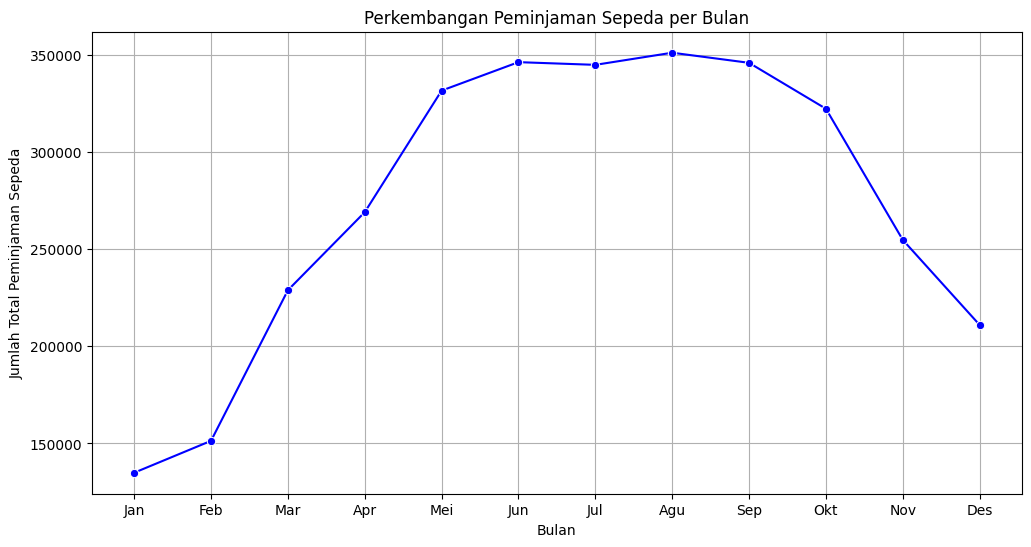

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', data=monthly_rentals, marker='o', color='blue')

plt.title('Perkembangan Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Total Peminjaman Sepeda')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])

plt.grid(True)
plt.show()

### Pertanyaan 2: Berapa besar perbandingan antara pengguna casual dan registered?

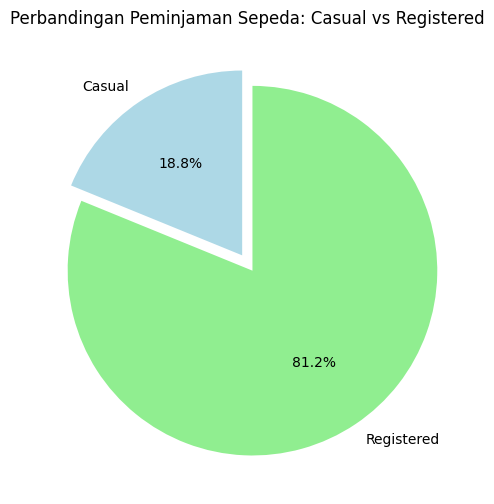

In [25]:
# Menggunakan pie chart
total_casual = bike_per_day_df['casual'].sum()
total_registered = bike_per_day_df['registered'].sum()

plt.figure(figsize=(8, 6))
labels = ['Casual', 'Registered']
values = [total_casual, total_registered]
colors = ['lightblue', 'lightgreen']
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.05, 0.05))
plt.title('Perbandingan Peminjaman Sepeda: Casual vs Registered')
plt.show()

In [19]:
print(f"Total peminjaman pengguna Casual: {total_casual}")
print(f"Total peminjaman pengguna Registered: {total_registered}")

Total peminjaman pengguna Casual: 620017
Total peminjaman pengguna Registered: 2672662


### Pertanyaan 3: Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda di setiap musim?

In [20]:
seasonal_avg = bike_per_day_df.groupby('season')['cnt'].mean().reset_index()
seasonal_avg.head()

,season,cnt
0,1,2604.132597
1,2,4992.331522
2,3,5644.303191
3,4,4728.162921


C:\Users\DWIKY SUMARLIN\AppData\Local\Temp\ipykernel_28092\1162349949.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=seasonal_avg, palette=colors)


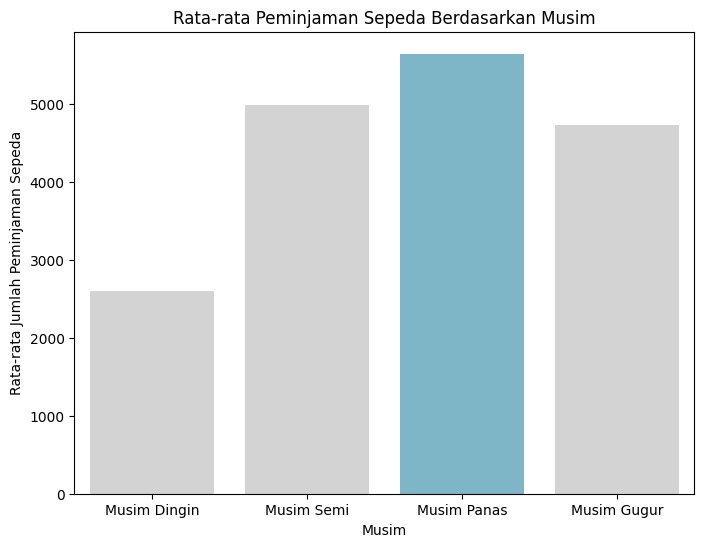

In [24]:
colors = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt', data=seasonal_avg, palette=colors)
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda')
plt.xticks(ticks=range(4), labels=['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])
plt.show()

**Insight:**
- Pada pertanyaan pertama memvisualisasikannya menggunakan line plot yang terlihat banyaknya pengguna yang menggunakannya pada bulan tertentu.
- Pertanyaan kedua divisualisasikan menggunakan pie chart agar terlihat jelas sebaran pengguna atau peminjam casual dan registered, yang mana terlihat bahwa pengguna registered lebih banyak dibandingkan dengan pengguna casual.
- Pertanyaan ketiga divisualisasikan dengan menggunakan bar plot sehingga terlihat rata-rata pengguna atau peminjam berdasarkan musim, yang mana terlihat bahwa musim panas menjadi musin favorit banyak pengguna untuk menggunakan sepeda.

## Conclusion

- Conclusion pertanyaan 1: Hasil dari pengamatan menunjukkan bahwa pengguna atau peminjam sepeda lebih banyak menggunakannya pada pertengahan tahun dari mulai bulan Mei hingga bulan Oktober dan puncaknya pada bulan Agustus dari kedua tahun tersebut. Jadi, perkembangannya akan mulai melandai pada akhir tahun hingga bulan Januari.
- Conclusion pertanyaan 2: Hasil dari pengamatan menunjukkan bahwa pengguna atau peminjam sepeda registered lebih banyak dibanding dengan casual, ini dapat berarti sepeda banyak digunakan oleh warga setempat dibanding oleh pengguna wisatawan. Jadi, pengguna atau peminjam registered sebesar 4/5 dari seluruh pengguna atau peminjam sepeda. 
- Conclusion pertanyaan 3: Hasil dari pengamatan dapat terlihat bahwa pengguna atau peminjam sepeda lebih banyak memakainya pada musim panas. Hal ini karena jika pada musim dingin pengguna atau peminjam lebih memakai transportasi yang tertutup. Jadi, iklim sangat mempengaruhi penggunaan atau peminjaman sepeda tersebut.